<a href="https://colab.research.google.com/github/magda-r/nlp-covid19/blob/master/notebooks/nlp_covid19_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## COVID-19 - Tweets' EDA

This notebook contains EDA (Exploratory Data Analysis) for COVID-19 related tweets organized according ot the following steps:

1. Context and datset info    
2. Imports and loading data
3. Covid situation worldwide
4. Basic EDA
5. Word Clouds
6. Bigrams and Trigrams



### 1. Context 

Dataset consists of 426,426 tweets exctacted using Tweepy (with developer access, tweets up to 7 days old) and snscraper (tweets older than 7 days) libraries with Twitter API.  

Applied filters:
- timeframes: 2020-03-01 - 2021-04-30 (maximum 1000 tweets per day)  
- query keywords: covid, coronavirus, corona, pandemic, vaccine, vaccinated, lockdown, quarantine 
- retweets and replies excluded
- only English language included 

### 2. Imports and loading data


In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import nltk
import string
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer

In [2]:
tweets_df = pd.read_csv('../data/covid19_tweets_snscrape_daily.csv')
covid_df = pd.read_csv('../data/owid-covid-data.csv')

In [3]:
tweets_df.head()

,id,text,datetime,no_replies,no_retweets,no_likes,user,location,no_followers
0,1234267171276099588,#travelbannow\n#Coronavirus outbreak fears cau...,2020-03-01 23:59:59+00:00,0,0,1,GreenMtnBoy359,14th State,194
1,1234267168843403266,It was said that once the president declared i...,2020-03-01 23:59:59+00:00,0,0,4,John D. Pieratt,"Austin - Giddings, Texas.",11985
2,1234267164229734401,Postal worker tests positive for coronavirus -...,2020-03-01 23:59:58+00:00,0,0,0,Brazenly🐕Liberal,Back of Beyond,1605
3,1234267161855590400,Coronavirus discovered in Moscow\nMilan Connec...,2020-03-01 23:59:57+00:00,0,2,2,Elisa E. H.❤에리사벳타,CA,232
4,1234267155941789698,Coronavirus: Pence defends Trump Jr claim Demo...,2020-03-01 23:59:56+00:00,0,0,0,Baby to Boomer LS,Near Seattle WA,18104


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426426 entries, 0 to 426425
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            426426 non-null  int64 
 1   text          426426 non-null  object
 2   datetime      426426 non-null  object
 3   no_replies    426426 non-null  int64 
 4   no_retweets   426426 non-null  int64 
 5   no_likes      426426 non-null  int64 
 6   user          426391 non-null  object
 7   location      320335 non-null  object
 8   no_followers  426426 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 29.3+ MB


In [5]:
tweets_df.iloc[0,1]

"#travelbannow\n#Coronavirus outbreak fears cause @Delta Airlines to suspend all flights to Milan from New Yorks's JFK starting tomorrow https://t.co/hodle6ISND"

In [6]:
tweets_df.iloc[1,1]

'It was said that once the president declared it a pandemic that all testing is free. https://t.co/xcKsGOMxuu'

In [7]:
tweets_df.iloc[2,1]

'Postal worker tests positive for coronavirus - ABC News https://t.co/XccH0sk1lc (via @ABC)'

### 3. Covid situation worldwide


In [8]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98432 entries, 0 to 98431
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               98432 non-null  object 
 1   continent                              93808 non-null  object 
 2   location                               98432 non-null  object 
 3   date                                   98432 non-null  object 
 4   total_cases                            94976 non-null  float64
 5   new_cases                              94973 non-null  float64
 6   new_cases_smoothed                     93963 non-null  float64
 7   total_deaths                           84879 non-null  float64
 8   new_deaths                             85035 non-null  float64
 9   new_deaths_smoothed                    93963 non-null  float64
 10  total_cases_per_million                94470 non-null  float64
 11  ne

In [9]:
covid_df = covid_df.loc[(covid_df['date'] >= '2020-03-01') & (covid_df['date'] <= '2021-04-30')]
covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
10,AFG,Asia,Afghanistan,2020-03-05,4.0,0.0,0.429,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [10]:
# covid_worldwide = covid_df[['date', 'total_cases', 'total_deaths', 'total_tests', 'people_vaccinated']].groupby('date').sum()
covid_worldwide = covid_df[['date', 'new_cases', 'new_deaths', 'new_tests', 'new_vaccinations']].groupby('date').sum()
covid_worldwide = covid_worldwide.reset_index()
covid_worldwide = pd.melt(covid_worldwide, id_vars="date", var_name='type', value_name='value')

fig = px.line(covid_worldwide, x="date", y="value", color='type', title="Reported data in time")
fig.show()

In [11]:
# countries with highest death ratio
covid_top_countires = covid_df.loc[covid_df['date'] == '2021-04-30']
covid_top_countires = covid_top_countires[['location', 'total_deaths_per_million']].drop_duplicates().sort_values('total_deaths_per_million', ascending=False).reset_index(drop=True)

display(covid_top_countires.head(15))
countries_list = covid_top_countires.iloc[0:15,0].tolist() 

,location,total_deaths_per_million
0,Peru,5055.859
1,Hungary,2850.828
2,Czechia,2732.940
3,San Marino,2651.895
4,Bosnia and Herzegovina,2606.365
5,Montenegro,2380.338
6,Bulgaria,2360.096
7,North Macedonia,2330.348
8,Slovakia,2140.067
9,Belgium,2090.665


In [12]:
fig = px.line(covid_df.loc[covid_df['location'].isin(countries_list)], x="date", y="total_deaths_per_million", color='location', title="Reported data in time")
fig.show()

In [13]:
fig = px.line(covid_df.loc[covid_df['location'].isin(countries_list)], x="date", y="new_deaths_per_million", color='location', title="Reported data in time")
fig.show()

### 4. Basic EDA


Text(0.5, 1.0, 'Number of Tweets per location (top 15)')

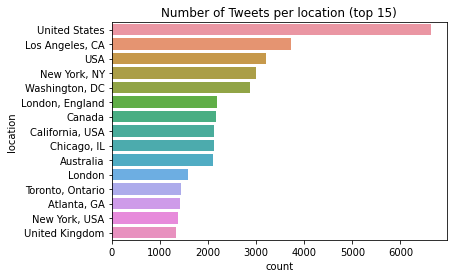

In [14]:
sns.countplot(y="location", data=tweets_df, order=tweets_df.location.value_counts().iloc[:15].index).set_title('Number of Tweets per location (top 15)')

In [15]:
# # number of followers retweets replies and likes
# tweets_df_stats = pd.melt(tweets_df, id_vars='id', value_vars=['no_followers', 'no_retweets', 'no_replies', 'no_likes'], var_name='type', value_name='value')

# fig = px.histogram(tweets_df_stats, 
#                     x="value", 
#                     color="type", 
#                     marginal="rug", # box violin
#                     hover_data=tweets_df_stats.columns)
# fig.show()

#### Text clean-up

Remove punctuations  
Tokenization - Converting a sentence into list of words  
Remove stopwords  
Lammetization/stemming - Tranforming any form of a word to its root word  

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
df = tweets_df[['text']]
df.head()

,text
0,#travelbannow\n#Coronavirus outbreak fears cau...
1,It was said that once the president declared i...
2,Postal worker tests positive for coronavirus -...
3,Coronavirus discovered in Moscow\nMilan Connec...
4,Coronavirus: Pence defends Trump Jr claim Demo...


In [26]:
# cleaning functions
def clean_text(text):
    
    # lowercase
    text_lc = text.lower()
    
    # remove URL part 
    text_url = text_lc.split(' https')[0]

    # remove punctation
    text_punc = "".join([word for word in text_url if word not in string.punctuation]) 
    text_punc = re.sub('[0-9]+', '', text_punc)
    return text_punc

df['text_clean'] = df['text'].apply(lambda x: clean_text(x))
df.head(10)

<ipython-input-26-6e624c704802>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,text,text_c,text_clean
0,#travelbannow\n#Coronavirus outbreak fears cau...,"[travelbannow, outbreak, fears, cause, delta, ...",travelbannow\ncoronavirus outbreak fears cause...
1,It was said that once the president declared i...,"[said, president, declared, testing, free]",it was said that once the president declared i...
2,Postal worker tests positive for coronavirus -...,"[postal, worker, tests, positive, abc, news]",postal worker tests positive for coronavirus ...
3,Coronavirus discovered in Moscow\nMilan Connec...,"[discovered, moscow, milan, connection, lookner]",coronavirus discovered in moscow\nmilan connec...
4,Coronavirus: Pence defends Trump Jr claim Demo...,"[pence, defends, trump, jr, claim, democrats, ...",coronavirus pence defends trump jr claim democ...
5,The coronavirus has likely already dealt many ...,"[likely, already, dealt, many, economic, blows...",the coronavirus has likely already dealt many ...
6,Qatar confirms two more coronavirus cases: Liv...,"[qatar, confirms, two, cases, live, updates, a...",qatar confirms two more coronavirus cases live...
7,Your #coronavirus questions answered with Dr. ...,"[questions, answered, dr, maiamajumder, novel,...",your coronavirus questions answered with dr ma...
8,It’s a very intentional thing to say the first...,"[s, intentional, thing, say, first, case, conf...",it’s a very intentional thing to say the first...
9,Blaming low wage wrkrs for the spread of the c...,"[blaming, low, wage, wrkrs, spread, coronaviru...",blaming low wage wrkrs for the spread of the c...


In [ ]:
# cleaning functions
def clean_text2(text):
    # tokenization
    tokens = re.split('\W+', text_punc)

    # remove stopwords
    stopwords = set(stopwords.words('english'))
    # excluding keywords used in query
    stopwords.update(['covid', 'covid19', 'coronavirus', 'corona', 'virus', 'pandemic', 'vaccine',      'vaccinated', 'lockdown', 'quarantine' ])

    text_stop = [word for word in tokens if word not in stopwords]
    return text_stop

In [ ]:
# Stemming and Lemmatization 
def stem_lem_transform(text, method='stemming'):
    if method=='stemming':
        # stemming
        ps = nltk.PorterStemmer()
        text_stem = [ps.stem(word) for word in text_stop] 
        return text_stem

    elif method=='lemmatization':
        # lemmatization
        wn = nltk.WordNetLemmatizer()
        text = [wn.lemmatize(word) for word in text]
    else:
        print('Invalid method')



In [ ]:
df['text_wc'] = df['text_c'].apply(lambda x: stem_lem_transform(x, method='stemming')

### 5. Word Clouds


In [38]:
string = pd.Series(df['text_clean']).str.cat(sep=' ')

In [39]:
stopwords = set(STOPWORDS)
# excluding keywords used in query
stopwords.update(['covid', 'covid19', 'coronavirus', 'corona', 'virus', 'pandemic', 'vaccine',      'vaccinated', 'lockdown', 'quarantine'])
# excluding a couple more irrelevant ones
stopwords.update(['u', 's', 've', 'don'])

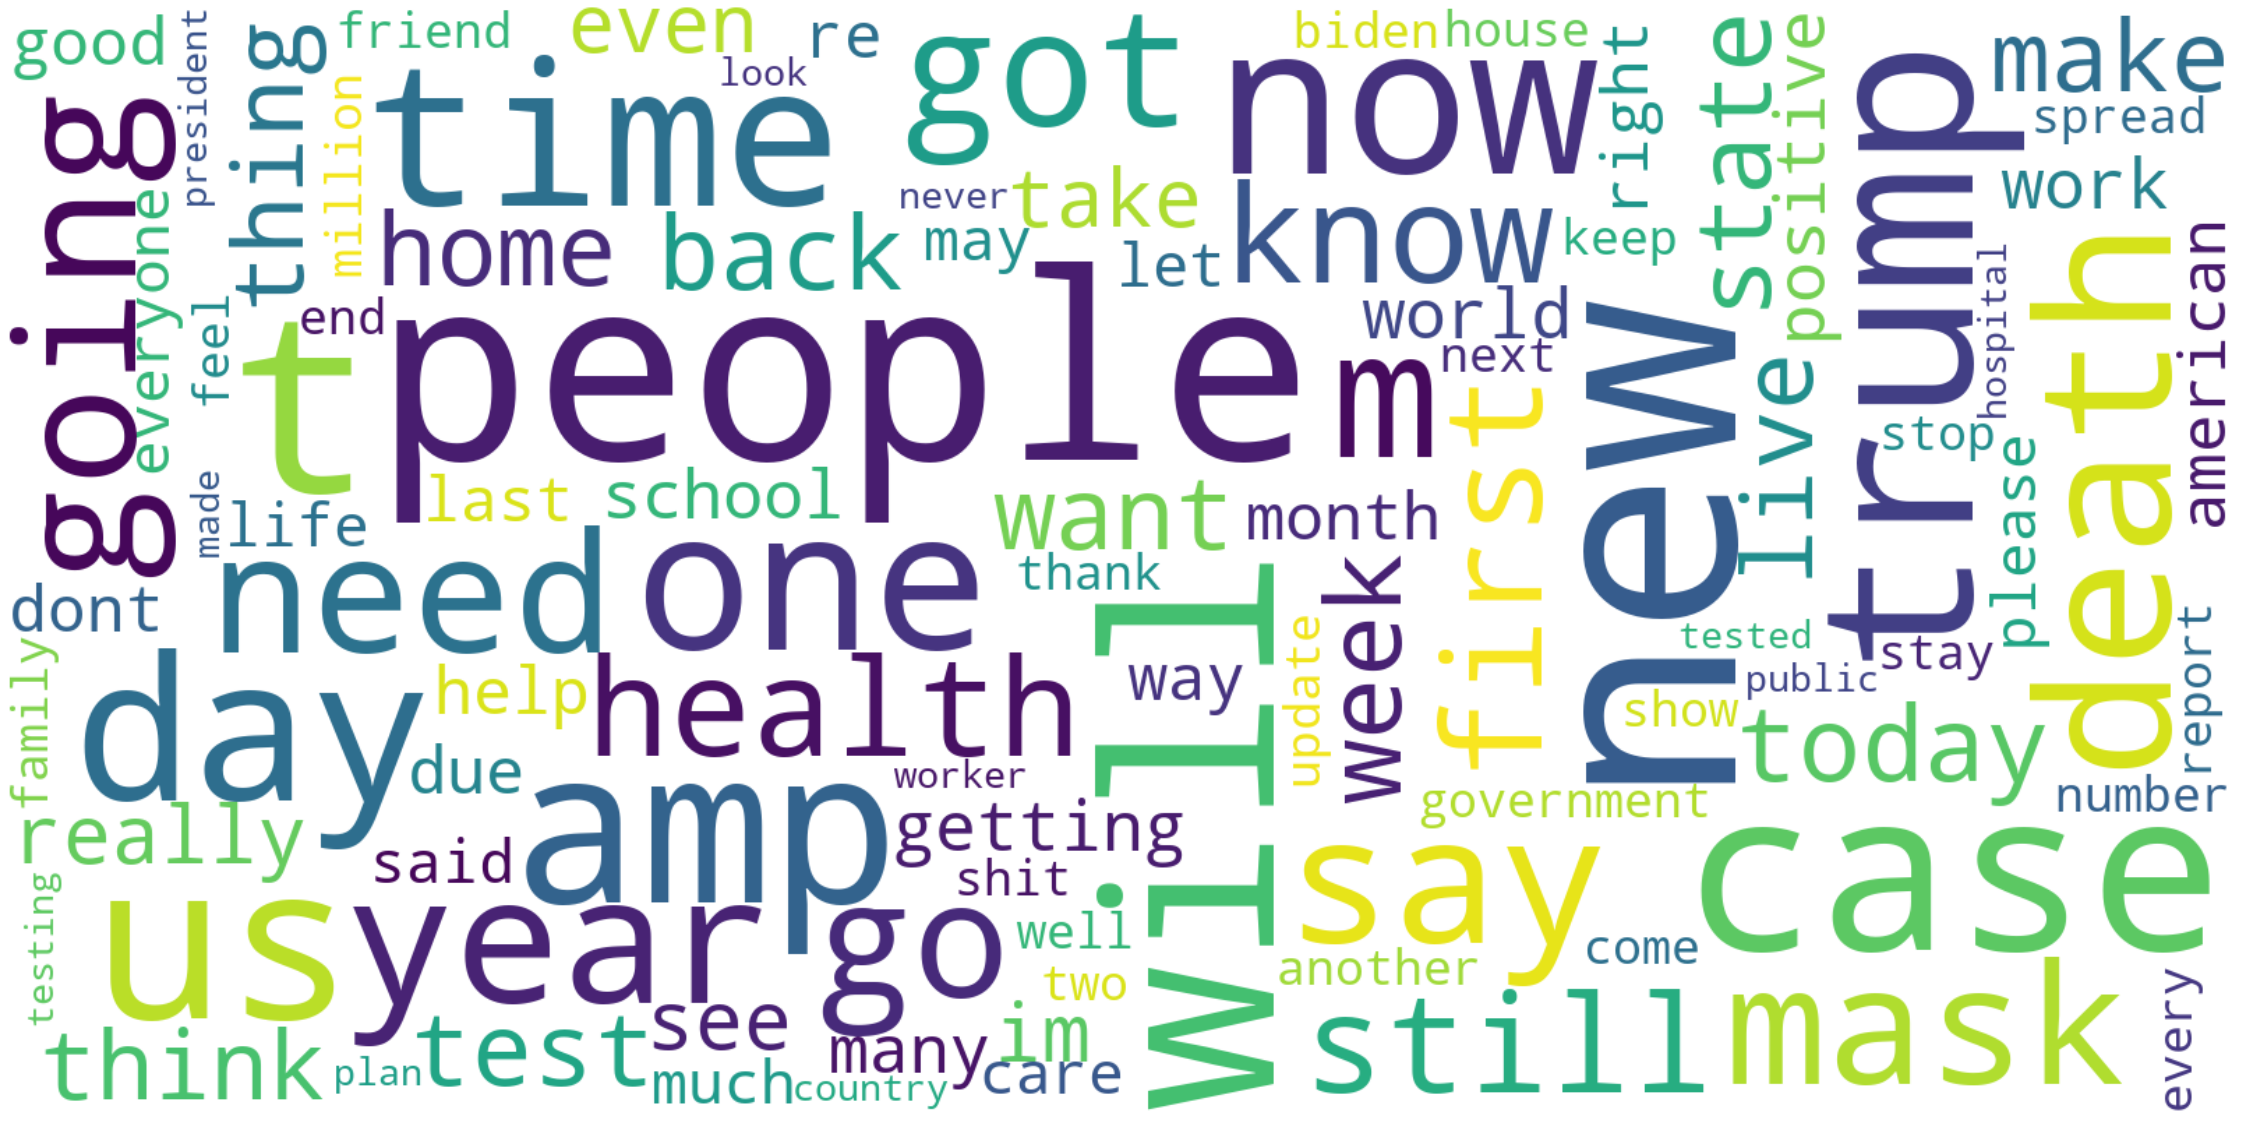

In [40]:
wordcloud = WordCloud(width=1600, stopwords=stopwords, height=800, max_font_size=200, max_words=100, collocations=False, background_color='white').generate_from_text(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 6. Bigrams and Trigrams